In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "YOUR_KEY"
os.environ["ACTIVELOOP_TOKEN"] = "YOUR_KEY"

In [ ]:
!pip install --upgrade --quiet newspaper3k lxml_html_clean langchain openai langchain_openai langchain-community deeplake[enterprise]==3.9.26 tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 28.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 86.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.5 MB/s e

In [ ]:
# We scrape several Artificial Intelligence news

import requests
from newspaper import Article # https://github.com/codelucas/newspaper
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

article_urls = [
    "https://www.cnn.com/2024/12/12/business/video/doug-ford-trump-tariffs-energy-digvid",
    "https://www.cnn.com/2024/12/02/world/video/the-lead-kirsten-hillman-canada-usa-relations-trump-trudeau-border-tariff-jake-tapper"
    "https://www.bbc.com/news/articles/c86q87yjgzjo",
    "https://www.bbc.com/news/articles/cvg7y52n411o?at_bbc_team=editorial&at_campaign_type=owned&at_format=link&at_link_id=0C146EE4-AB9A-11EF-BC0A-8820617FED87&at_link_origin=BBC_News&at_link_type=web_link&at_ptr_name=facebook_page",
    "https://www.bbc.com/news/live/c8xpzl8nnvwt?post=asset%3A10a9ad98-4ed5-4c74-819d-36a0576c097d",
    "https://www.bbc.com/news/world-us-canada-43270388",
    "https://www.bbc.com/news/articles/czx5p41696po?tblci=GiDPSpcbLTQvFpiK5Wzng-UVYWIGJhvv4xeeqqIV2srRyiDSv1so-ZOt_se-05beAQ",
]

session = requests.Session()
pages_content = [] # where we save the scraped articles

for url in article_urls:
    try:
        time.sleep(2) # sleep two seconds for gentle scraping
        response = session.get(url, headers=headers, timeout=10)

        if response.status_code == 200:
            article = Article(url)
            article.download() # download HTML of webpage
            article.parse() # parse HTML to extract the article text
            pages_content.append({ "url": url, "text": article.text })
        else:
            print(f"Failed to fetch article at {url}")
    except Exception as e:
        print(f"Error occurred while fetching article at {url}: {e}")

#If an error occurs while fetching an article, we catch the exception and print
#an error message. This ensures that even if one article fails to download,
#the rest of the articles can still be processed.

Failed to fetch article at https://www.cnn.com/2024/12/02/world/video/the-lead-kirsten-hillman-canada-usa-relations-trump-trudeau-border-tariff-jake-tapperhttps://www.bbc.com/news/articles/c86q87yjgzjo


In [ ]:
format(print(pages_content[1]["text"]))

Trump vows tariffs on Mexico, Canada and China on day one

Reuters

Donald Trump says he will hit China, Mexico and Canada with new tariffs on day one of his presidency, in an effort to force them to crack down on illegal immigration and drug smuggling into the US. The US president-elect said he would sign an executive order imposing a 25% tariff on all goods coming from Mexico and Canada, after being inaugurated on 20 January 2025. He also said "we will be charging China an additional 10% tariff, above any additional tariffs" until it cracked down on fentanyl smuggling. The threat could mark a major escalation in tensions with the US's three top trading partners. It could also lead to higher prices for Americans, since tariffs work as a form of tax on imports.

The US is the world's largest importer. China, Mexico and Canada account for about 40% of the $3.2tn (£2.6tn) of goods it imports each year, according to official data. China has defended its efforts to stop the flow of illegal

'None'

In [ ]:
# We'll use an embedding model to compute our documents' embeddings
from langchain_openai import OpenAIEmbeddings

# We'll store the documents and their embeddings in the deep lake vector db
from langchain.vectorstores import DeepLake as LangChainDeepLake

# Setup deep lake
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "webdiner6"
my_activeloop_dataset_name = "financial_analyst"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
#db = deeplake(dataset_path=dataset_path, embedding_function=embeddings)
#DeepLake.from_documents(texts, embeddings, dataset_path=dataset_path)

/usr/local/lib/python3.10/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.3) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

all_texts = []
for d in pages_content:
    chunks = text_splitter.split_text(d["text"])
    for chunk in chunks:
        all_texts.append(chunk)

In [ ]:
#from langchain_community.document_loaders import TextLoader
#from langchain_text_splitters import CharacterTextSplitter

#loader = TextLoader(pages_content[1]["text"])
#documents = loader.load()
#text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
#docs = text_splitter.split_documents(documents)

#embeddings = OpenAIEmbeddings()

RuntimeError: Error loading Trump vows tariffs on Mexico, Canada and China on day one

Reuters

Donald Trump says he will hit China, Mexico and Canada with new tariffs on day one of his presidency, in an effort to force them to crack down on illegal immigration and drug smuggling into the US. The US president-elect said he would sign an executive order imposing a 25% tariff on all goods coming from Mexico and Canada, after being inaugurated on 20 January 2025. He also said "we will be charging China an additional 10% tariff, above any additional tariffs" until it cracked down on fentanyl smuggling. The threat could mark a major escalation in tensions with the US's three top trading partners. It could also lead to higher prices for Americans, since tariffs work as a form of tax on imports.

The US is the world's largest importer. China, Mexico and Canada account for about 40% of the $3.2tn (£2.6tn) of goods it imports each year, according to official data. China has defended its efforts to stop the flow of illegal drugs, and has warned that there can be no winner in a trade war between the two. After Trump made his tariff threat, he spoke to Canada's Prime Minister Justin Trudeau for about 10 minutes, discussing trade and border security, a Canadian government official told the BBC. They had a "good discussion", the source said. During the call, Trudeau pointed out that the number of migrants crossing the Canadian border was much smaller compared to the US-Mexico border, the official said. Mexico's finance ministry said: "Mexico is the United States' top trade partner, and the USMCA provides a framework of certainty for national and international investors."

The measures have the potential to cause disruptions to the global supply chain and would hit the three countries targeted by the tariffs hard. The tariffs on Mexico and Canada will remain in place until the two countries clamp down on drugs, particularly fentanyl, and migrants illegally crossing the border, Trump said in a post on his Truth Social platform. "Both Mexico and Canada have the absolute right and power to easily solve this long simmering problem," he wrote. "It is time for them to pay a very big price!" In a follow-up Truth Social post, Trump attacked Beijing for failing to follow through on promises that he said Chinese officials made to carry out the death penalty for people caught dealing fentanyl, a synthetic opioid. A spokesperson for the Chinese embassy in Washington told the BBC "the idea of China knowingly allowing fentanyl precursors to flow into the United States runs completely counter to facts and reality". "China believes that China-US economic and trade cooperation is mutually beneficial in nature. No one will win a trade war or a tariff war," he added. The Biden administration has been calling on Beijing to do more to stop the production of ingredients used in fentanyl, which Washington estimates killed almost 75,000 Americans last year. During his election campaign, Trump threatened Mexico and China with tariffs of up to 100%, if he deemed them necessary, much higher than those he put in place during his first term in office. Trump has also said he will end China's most-favoured-nation trading status with the US - the most advantageous terms Washington offers on tariffs and other restrictions. Last year, more than 80% of Mexico's exports went to the US, while around 75% of Canada's went to its southern neighbour. Even after years of a bitter trade dispute between the world's two biggest economies, the US still accounts for about 15% of China's exports.

How do tariffs work?

A tariff is a domestic tax levied on goods as they enter the country, proportional to the value of the import. So a car imported to the US with a value of $50,000 subject to a 25% tariff, would face a $12,500 charge. Tariffs are a central part of Trump's economic vision - he sees them as a way of growing the US economy, protecting jobs and raising tax revenue. He has previously claimed that these taxes are "not going to be a cost to you, it’s a cost to another country". This is almost universally regarded by economists as misleading. The charge is physically paid by the domestic company that imports the goods, not the foreign company that exports them. So, in that sense, it is a straightforward tax paid by domestic US firms to the US government. Trump imposed a number of tariffs in his first term of office, many of which have been kept in place by his successor, President Joe Biden. Economic studies suggest most of the economic burden was ultimately borne by US consumers. It was not immediately clear whether Trump's "additional 10% tariff, above any additional tariffs" earmarked for China were on top of the 25% he was planning for Canada and Mexico.

What is Trump's strategy?

The move is "clearly consistent with his promise that he made during the campaign to utilise tariffs as a weapon to accomplish many of his policy initiatives," Stephen Roach, Senior Fellow at the Paul Tsai China Center of Yale Law School, told the BBC's Business Today programme. Trump's pick for Treasury Secretary, Scott Bessent, has previously suggested that the president-elect's threats to impose major tariff hikes were part of his negotiating strategy. “My general view is that at the end of the day, he's a free trader," Bessent said of Trump in an interview with the Financial Times before he was nominated for the role. “It’s escalate to de-escalate.” It comes as the Chinese economy is in a significantly more vulnerable position than it was during the previous Trump presidency. The country has been struggling with a number of serious issues, including an ongoing property market crisis, weak domestic demand and growing local government debt. The new tariffs appear to break the terms of the US-Mexico-Canada Agreement (USMCA) on trade. The deal, which Trump signed into law, took effect in 2020. It continued a largely duty-free trading relationship between the three neighbouring countries. Outside the official reaction from the three countries affected, the response has been critical. Doug Ford, the premier of the Canadian province of Ontario, said Trump's planned tariff would be "devastating to workers and jobs in both Canada and the US". Leader of the Mexican senate, Gerardo Fernández, asked: "What tariffs should we impose on their [America's] goods until they stop consuming drugs and illegally exporting weapons to our homeland?"

In [ ]:
import deeplake
print(deeplake.__version__)
#_DEEPLAKE_INSTALLED = True

3.9.26


In [ ]:
db = LangChainDeepLake(dataset_path=dataset_path, embedding=embeddings, overwrite=True)

Your Deep Lake dataset has been successfully created!


In [ ]:
db.add_texts(all_texts)

Creating 24 embeddings in 1 batches of size 24:: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

Dataset(path='hub://webdiner6/financial_analyst', tensors=['text', 'metadata', 'embedding', 'id'])

  tensor      htype      shape      dtype  compression
  -------    -------    -------    -------  ------- 
   text       text      (24, 1)      str     None   
 metadata     json      (24, 1)      str     None   
 embedding  embedding  (24, 1536)  float32   None   
    id        text      (24, 1)      str     None   


['b6ddfd6e-d353-11ef-974d-0242ac1c0002',
 'b6ddffbc-d353-11ef-974d-0242ac1c0002',
 'b6de0084-d353-11ef-974d-0242ac1c0002',
 'b6de014c-d353-11ef-974d-0242ac1c0002',
 'b6de021e-d353-11ef-974d-0242ac1c0002',
 'b6de02fa-d353-11ef-974d-0242ac1c0002',
 'b6de03ae-d353-11ef-974d-0242ac1c0002',
 'b6de046c-d353-11ef-974d-0242ac1c0002',
 'b6de0520-d353-11ef-974d-0242ac1c0002',
 'b6de05d4-d353-11ef-974d-0242ac1c0002',
 'b6de067e-d353-11ef-974d-0242ac1c0002',
 'b6de0728-d353-11ef-974d-0242ac1c0002',
 'b6de07d2-d353-11ef-974d-0242ac1c0002',
 'b6de0886-d353-11ef-974d-0242ac1c0002',
 'b6de0930-d353-11ef-974d-0242ac1c0002',
 'b6de09da-d353-11ef-974d-0242ac1c0002',
 'b6de0a8e-d353-11ef-974d-0242ac1c0002',
 'b6de0b42-d353-11ef-974d-0242ac1c0002',
 'b6de0bf6-d353-11ef-974d-0242ac1c0002',
 'b6de0caa-d353-11ef-974d-0242ac1c0002',
 'b6de0d68-d353-11ef-974d-0242ac1c0002',
 'b6de0e12-d353-11ef-974d-0242ac1c0002',
 'b6de0ebc-d353-11ef-974d-0242ac1c0002',
 'b6de0f66-d353-11ef-974d-0242ac1c0002']

##Create a Retriever Tool

In [ ]:
################################OLD CODE########################################

# Get the retriever object from the deep lake db object and set the number
# of retrieved documents to 3
retriever = db.as_retriever()
retriever.search_kwargs['k'] = 3

# We define some variables that will be used inside our custom tool
CUSTOM_TOOL_DOCS_SEPARATOR ="\n---------------\n" # how to join together the retrieved docs to form a single string

# This is the function that defines our custom tool that retrieves relevant
# docs from Deep Lake
def retrieve_n_docs_tool(query: str) -> str:
    """Searches for relevant documents that may contain the answer to the query."""
    docs = retriever.get_relevant_documents(query)
    CUSTOM_TOOL_DOCS_SEPARATOR ="\n---------------\n"
    texts = [doc.page_content for doc in docs]
    texts_merged = "---------------\n" + CUSTOM_TOOL_DOCS_SEPARATOR.join(texts) + "\n---------------"
    return texts_merged

In [ ]:
from pydantic import BaseModel, Field

class retriever_docs_input(BaseModel):
    q: str = Field(description="query from the user")


def retrieve_docs_f(q: str) -> str:
    """Searches for relevant documents that may contain the answer to the query."""
    retriever = db.as_retriever()
    retriever.search_kwargs['k'] = 3
    docs = retriever.get_relevant_documents(q)
    texts = [doc.page_content for doc in docs]
    texts_merged = "---------------\n" + CUSTOM_TOOL_DOCS_SEPARATOR.join(texts) + "\n---------------"
    return texts_merged

from langchain_core.tools import StructuredTool


retrieve_docs = StructuredTool.from_function(
    func=retrieve_docs_f,
    name="retrieve_docs",
    description="Searches for relevant documents that may contain the answer to the query.",
    args_schema=retriever_docs_input,
    return_direct=True,
    # coroutine= ... <- you can specify an async method if desired as well
)


In [ ]:
tools = [retrieve_docs]

# Building the Plan and Execute Agent

In [ ]:
!pip install -q langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.2 MB/s eta 0:00:00


## Agent Executor

In [ ]:
from langchain import hub
from langchain_openai import ChatOpenAI

from langgraph.prebuilt import create_react_agent

# Get the prompt to use - you can modify this!
prompt = hub.pull("ih/ih-react-agent-executor")
prompt.pretty_print()

# Choose the LLM that will drive the agent
llm = ChatOpenAI(model="gpt-4o-mini")
agent_executor = create_react_agent(llm, tools, state_modifier=prompt)

================================ System Message ================================

You are a helpful assistant.

============================= Messages Placeholder =============================

{messages}


/usr/local/lib/python3.10/dist-packages/langsmith/client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


##Define the State

In [ ]:
import operator
from typing import Annotated, List, Tuple
from typing_extensions import TypedDict


class PlanExecute(TypedDict):
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str

## Planning Step

In [ ]:
from pydantic import BaseModel, Field


class Plan(BaseModel):
    """Plan to follow in future"""

    steps: List[str] = Field(
        description="different steps to follow, should be in sorted order"
    )

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.""",
        ),
        ("placeholder", "{messages}"),
    ]
)
planner = planner_prompt | ChatOpenAI(
    model="gpt-4o-mini", temperature=0
).with_structured_output(Plan)

## Re-Plan Step

In [ ]:
from typing import Union


class Response(BaseModel):
    """Response to user."""

    response: str


class Act(BaseModel):
    """Action to perform."""

    action: Union[Response, Plan] = Field(
        description="Action to perform. If you want to respond to user, use Response. "
        "If you need to further use tools to get the answer, use Plan."
    )


replanner_prompt = ChatPromptTemplate.from_template(
    """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.

Your objective was this:
{input}

Your original plan was this:
{plan}

You have currently done the follow steps:
{past_steps}

Update your plan accordingly. If no more steps are needed and you can return to the user, then respond with that. Otherwise, fill out the plan. Only add steps to the plan that still NEED to be done. Do not return previously done steps as part of the plan."""
)


replanner = replanner_prompt | ChatOpenAI(
    model="gpt-4o-mini", temperature=0
).with_structured_output(Act)

##Create the Graph

In [ ]:
from typing import Literal
from langgraph.graph import END


async def execute_step(state: PlanExecute):
    plan = state["plan"]
    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    task = plan[0]
    task_formatted = f"""For the following plan:
{plan_str}\n\nYou are tasked with executing step {1}, {task}."""
    agent_response = await agent_executor.ainvoke(
        {"messages": [("user", task_formatted)]}
    )
    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
    }


async def plan_step(state: PlanExecute):
    plan = await planner.ainvoke({"messages": [("user", state["input"])]})
    return {"plan": plan.steps}


async def replan_step(state: PlanExecute):
    output = await replanner.ainvoke(state)
    if isinstance(output.action, Response):
        return {"response": output.action.response}
    else:
        return {"plan": output.action.steps}


def should_end(state: PlanExecute):
    if "response" in state and state["response"]:
        return END
    else:
        return "agent"

In [ ]:
from langgraph.graph import StateGraph, START

workflow = StateGraph(PlanExecute)

# Add the plan node
workflow.add_node("planner", plan_step)

# Add the execution step
workflow.add_node("agent", execute_step)

# Add a replan node
workflow.add_node("replan", replan_step)

workflow.add_edge(START, "planner")

# From plan we go to agent
workflow.add_edge("planner", "agent")

# From agent, we replan
workflow.add_edge("agent", "replan")

workflow.add_conditional_edges(
    "replan",
    # Next, we pass in the function that will determine which node is called next.
    should_end,
    ["agent", END],
)

# Finally, we compile it!
# This compiles it into a LangChain Runnable,
# meaning you can use it as you would any other runnable
app = workflow.compile()

## Draw the Graph

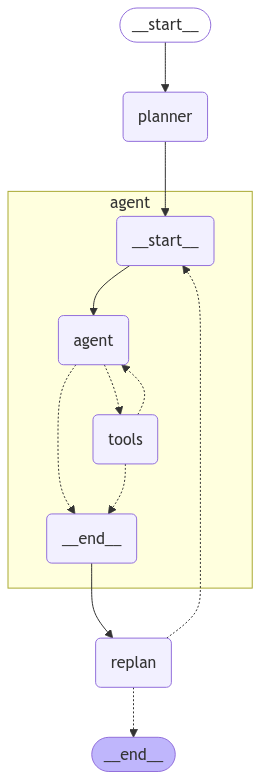

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
config = {"recursion_limit": 20}
inputs = {"input": "Summarise the tariff war between US and Canada in 10 words?"}
async for event in app.astream(inputs, config=config):
    for k, v in event.items():
        if k != "__end__":
            print(v)

{'plan': ['Identify key events in US-Canada tariff war', 'Summarize events in concise language', 'Limit summary to 10 words', 'Ensure clarity and accuracy in summary', 'Review and finalize the summary for completeness.']}
{'past_steps': [('Identify key events in US-Canada tariff war', '---------------\nweak domestic demand and growing local government debt. The new tariffs appear to break the terms of the US-Mexico-Canada Agreement (USMCA) on trade. The deal, which Trump signed into law, took effect in 2020. It continued a largely duty-free trading relationship between the three neighbouring countries. Outside the official reaction from the three countries affected, the response has been critical. Doug Ford, the premier of the Canadian province of Ontario, said Trump\'s planned tariff would be "devastating to workers and jobs in both Canada and the US". Leader of the Mexican senate, Gerardo Fernández, asked: "What tariffs should we impose on their [America\'s] goods until they stop con

GraphRecursionError: Recursion limit of 20 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT